# A notebook for experimenting with POS tagging and noun phrase extraction using spaCy.
## extracting statistics widely across participants

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
df = pd.read_csv("/mnt/hdd/anatkorol/Imagination_in_translation/Data/processed_data/10122025_pilot_2/nlp_analysis/docs_df.csv")
df = df.copy()
OUT_DIR = Path("/mnt/hdd/anatkorol/Imagination_in_translation/analysis/pilot-2_gpt-image-1/pos_tagging")

In [3]:
df.columns

Index(['uid', 'gt', 'session', 'attempt', 'prompt', 'gen', 'subjective_score',
       'prompt_latency_secs', 'generating_latency_secs', 'rating_latency_secs',
       'ts', 'study_result', 'comp_result', 'verbosity',
       'clip_cosine_distance', 'vgg_fc7_distance', 'clip_vis_text_similarity',
       'token_num', 'doc_id', 'pos_ADJ', 'pos_ADP', 'pos_ADV', 'pos_AUX',
       'pos_CCONJ', 'pos_DET', 'pos_NOUN', 'pos_NUM', 'pos_PART', 'pos_PRON',
       'pos_PROPN', 'pos_SCONJ', 'pos_SPACE', 'pos_VERB', 'n_tokens',
       'pos_ADJ_prop', 'pos_ADP_prop', 'pos_ADV_prop', 'pos_AUX_prop',
       'pos_CCONJ_prop', 'pos_DET_prop', 'pos_NOUN_prop', 'pos_NUM_prop',
       'pos_PART_prop', 'pos_PRON_prop', 'pos_PROPN_prop', 'pos_SCONJ_prop',
       'pos_SPACE_prop', 'pos_VERB_prop', 'n_noun_chunks', 'n_unique_np_heads',
       'np_heads'],
      dtype='object')

In [4]:
df = df[['uid', 'gt', 'session', 'attempt', 'token_num', 'pos_NOUN', 'pos_PROPN','pos_ADJ', 'pos_ADP', 'n_tokens', 'n_noun_chunks', 'n_unique_np_heads',
       'np_heads']]

In [5]:
df.head(5)

,uid,gt,session,attempt,token_num,pos_NOUN,pos_PROPN,pos_ADJ,pos_ADP,n_tokens,n_noun_chunks,n_unique_np_heads,np_heads
0,c2s9h6gg1765201285699,living_room_h.jpg,1,1,130,33,0,17,16,117,29,22,"background, bottom, center, corner, couch, flo..."
1,c2s9h6gg1765201285699,living_room_h.jpg,1,2,184,46,0,20,23,165,43,29,"background, bottom, bulb, center, corner, couc..."
2,c2s9h6gg1765201285699,living_room_h.jpg,1,3,185,46,0,21,21,170,42,30,"background, bottom, center, corner, couch, flo..."
3,c2s9h6gg1765201285699,bedroom_l.jpg,2,1,211,53,0,22,25,185,49,32,"bed, bedframe, bedroom, bench, book, bottom, c..."
4,c2s9h6gg1765201285699,bedroom_l.jpg,2,2,210,55,0,24,25,185,49,33,"angle, arm, bed, bedframe, bedroom, bench, boo..."


# visualizing counts for different pos tags

In [6]:
metrics = ["pos_NOUN", "n_unique_np_heads", "pos_ADJ", "pos_ADP"]

# If you don't have pos_NOUN because your pos columns differ,
# check with: [c for c in df.columns if c.startswith("pos_")]


In [7]:
df["pos_NOUN_total"] = df.get("pos_NOUN", 0) + df.get("pos_PROPN", 0)
metrics = ["pos_NOUN_total", "n_unique_np_heads", "pos_ADJ", "pos_ADP"]


In [8]:
df

,uid,gt,session,attempt,token_num,pos_NOUN,pos_PROPN,pos_ADJ,pos_ADP,n_tokens,n_noun_chunks,n_unique_np_heads,np_heads,pos_NOUN_total
0,c2s9h6gg1765201285699,living_room_h.jpg,1,1,130,33,0,17,16,117,29,22,"background, bottom, center, corner, couch, flo...",33
1,c2s9h6gg1765201285699,living_room_h.jpg,1,2,184,46,0,20,23,165,43,29,"background, bottom, bulb, center, corner, couc...",46
2,c2s9h6gg1765201285699,living_room_h.jpg,1,3,185,46,0,21,21,170,42,30,"background, bottom, center, corner, couch, flo...",46
3,c2s9h6gg1765201285699,bedroom_l.jpg,2,1,211,53,0,22,25,185,49,32,"bed, bedframe, bedroom, bench, book, bottom, c...",53
4,c2s9h6gg1765201285699,bedroom_l.jpg,2,2,210,55,0,24,25,185,49,33,"angle, arm, bed, bedframe, bedroom, bench, boo...",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,gpt-5,living_room_h.jpg,4,2,115,34,1,37,10,102,19,19,"chair, clutter, color, corner, daylight, floor...",35
101,gpt-5,living_room_h.jpg,4,3,198,54,1,48,17,169,39,33,"armchair, artwork, atmosphere, ceiling, cobalt...",55
102,gpt-5,tower_l.jpg,5,1,105,25,6,24,10,82,19,18,"base, belfry, berkeley, campanile, color, deta...",31
103,gpt-5,tower_l.jpg,5,2,112,29,7,27,9,89,23,21,"belfry, berkeley, block, building, composition...",36


In [9]:
overall_means = df[metrics].mean(numeric_only=True)
print(overall_means)


pos_NOUN_total       27.704762
n_unique_np_heads    17.752381
pos_ADJ              15.952381
pos_ADP              12.133333
dtype: float64


In [10]:
rate_cols = []
for m in metrics:
    rate_name = m + "_per_token"
    df[rate_name] = df[m] / df["n_tokens"].replace(0, pd.NA)
    rate_cols.append(rate_name)

overall_rates = df[rate_cols].mean(numeric_only=True)
print(overall_rates)


pos_NOUN_total_per_token       0.303639
n_unique_np_heads_per_token    0.209280
pos_ADJ_per_token              0.169473
pos_ADP_per_token              0.137919
dtype: float64


In [11]:
per_participant = (
    df.groupby("uid")[metrics]
      .mean()
      .reset_index()
      .rename(columns={
          "pos_NOUN": "mean_nouns",
          "n_unique_np_heads": "mean_noun_chunk_heads",
          "pos_ADJ": "mean_adj",
          "pos_ADP": "mean_adp",
      })
)

per_attempt = (
    df.groupby("attempt")[metrics]
      .mean()
      .reset_index()
      .sort_values("attempt")
)


In [12]:
by_uid_gt_attempt = (
    df.groupby(["uid", "gt", "attempt"], as_index=False)[metrics]
      .mean()
)


In [14]:
attempt_mean_balanced = (
    by_uid_gt_attempt.groupby("attempt")[metrics]
      .mean()
      .reset_index()
      .sort_values("attempt")
)


In [15]:
# collapse across images within each participant+attempt
uid_attempt = (
    df.groupby(["uid", "attempt"], as_index=False)[metrics]
      .mean()
)

wide = uid_attempt.pivot(index="uid", columns="attempt", values=metrics)

# Example deltas: attempt 3 minus attempt 1
deltas = {}
for m in metrics:
    deltas[m + "_delta_3_minus_1"] = wide[m][3] - wide[m][1]

delta_df = pd.DataFrame(deltas).reset_index()

delta_df

,uid,pos_NOUN_total_delta_3_minus_1,n_unique_np_heads_delta_3_minus_1,pos_ADJ_delta_3_minus_1,pos_ADP_delta_3_minus_1
0,17t99kvz1765301165519,12.8,6.0,6.0,6.2
1,734m52011765314517645,11.0,8.2,5.8,6.4
2,c2s9h6gg1765201285699,6.0,3.6,3.6,2.2
3,d217h8bk1765289592077,16.2,6.8,7.0,6.8
4,gpt-5,7.0,4.8,4.6,4.6
5,o2en6rcr1765306270946,10.8,7.4,3.6,6.0
6,usj6if3d1765309873263,5.4,3.4,3.4,1.8



Per-metric summary (mean/std/var):
                            mean        std         var  n
metric                                                    
pos_NOUN_total         27.704762  13.227069  174.955344  7
mean_noun_chunk_heads  17.752381   7.421562   55.079577  7
mean_adj               15.952381   9.701219   94.113651  7
mean_adp               12.133333   5.226145   27.312593  7


/tmp/ipykernel_819799/2641585068.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", max(N, 1))  # will repeat-ish if N>20, but still distinct-ish


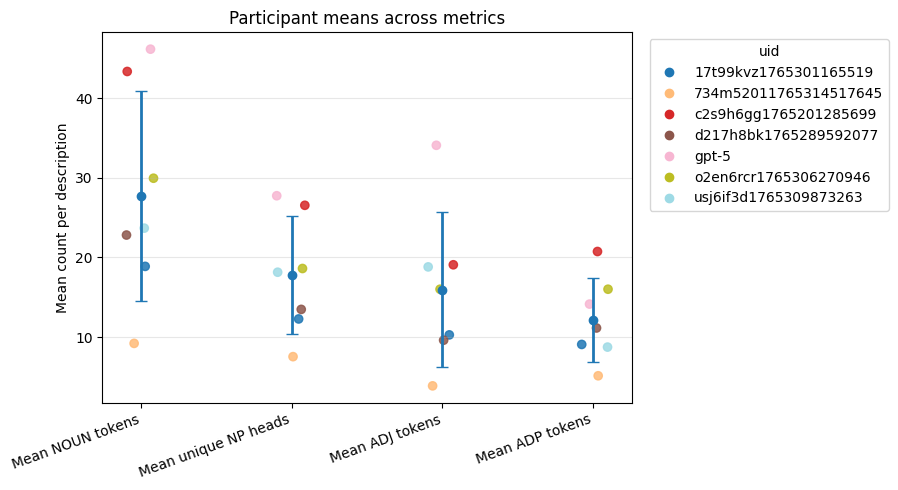

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Your mapping: column -> display label
metrics = {
    "pos_NOUN_total": "Mean NOUN tokens",
    "mean_noun_chunk_heads": "Mean unique NP heads",
    "mean_adj": "Mean ADJ tokens",
    "mean_adp": "Mean ADP tokens",
}

by_uid = per_participant.copy()  # columns: uid + metrics above

# --- long format: one row per (uid, metric)
long = by_uid.melt(
    id_vars=["uid"],
    value_vars=[c for c in metrics.keys() if c in by_uid.columns],
    var_name="metric",
    value_name="value",
).dropna()

# consistent x-axis order
metric_order = [c for c in metrics.keys() if c in long["metric"].unique()]
x_map = {m: i for i, m in enumerate(metric_order)}

# --- participant color map (uid -> color)
uids = sorted(long["uid"].astype(str).unique())
N = len(uids)
cmap = plt.cm.get_cmap("tab20", max(N, 1))  # will repeat-ish if N>20, but still distinct-ish
uid_to_color = {uid: cmap(i % cmap.N) for i, uid in enumerate(uids)}

# Optional: save mapping
color_map_df = pd.DataFrame({
    "uid": list(uid_to_color.keys()),
    "color_rgba": [uid_to_color[u] for u in uid_to_color.keys()],
})
# color_map_df.to_csv("uid_color_map.csv", index=False)

# --- build jittered x positions per point (deterministic jitter by uid)
rng = np.random.default_rng(0)
jitter = 0.10
x_base = long["metric"].map(x_map).astype(float).to_numpy()
x = x_base + rng.uniform(-jitter, jitter, size=len(x_base))
y = long["value"].to_numpy()

# colors per row based on uid
point_colors = long["uid"].astype(str).map(uid_to_color).to_list()

plt.figure(figsize=(9, 5))
plt.scatter(x, y, alpha=0.85, c=point_colors)

# --- mean + std per metric (across participants)
stats = (
    long.groupby("metric")["value"]
        .agg(mean="mean", std="std", var="var", n="count")
        .reindex(metric_order)
)

# Plot mean ± 1 SD as error bars + a mean marker
xs = np.arange(len(metric_order))
plt.errorbar(
    xs,
    stats["mean"].values,
    yerr=stats["std"].values,
    fmt="o",   # mean marker
    capsize=4,
    linewidth=2,
)

# --- axis labels
plt.xticks(
    ticks=xs,
    labels=[metrics[m] for m in metric_order],
    rotation=20,
    ha="right"
)
plt.ylabel("Mean count per description")
plt.title("Participant means across metrics")
plt.grid(True, axis="y", alpha=0.3)

# --- (Optional) print the variance table to console
print("\nPer-metric summary (mean/std/var):")
print(stats)

# --- legend (“map”) — WARNING: can get huge if many participants
# If you have many uids, consider not showing legend and just saving color_map_df.
max_legend = 25
if N <= max_legend:
    handles = [
        plt.Line2D([0], [0], marker='o', linestyle='', color=uid_to_color[uid], label=str(uid))
        for uid in uids
    ]
    plt.legend(handles=handles, title="uid", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.savefig(OUT_DIR / "participant_metric_means.png", dpi=300)
plt.show()


In [45]:
metrics

{'mean_nouns': 'Mean NOUN tokens',
 'mean_noun_chunk_heads': 'Mean unique NP heads',
 'mean_adj': 'Mean ADJ tokens',
 'mean_adp': 'Mean ADP tokens'}

In [30]:
import numpy as np
import matplotlib.pyplot as plt

df_attempt = by_uid_gt_attempt.copy()
df_attempt["attempt"] = df_attempt["attempt"].astype(int)

metric_col = "pos_NOUN_total"   # <-- change if needed
ylabel = "Mean NOUN tokens"


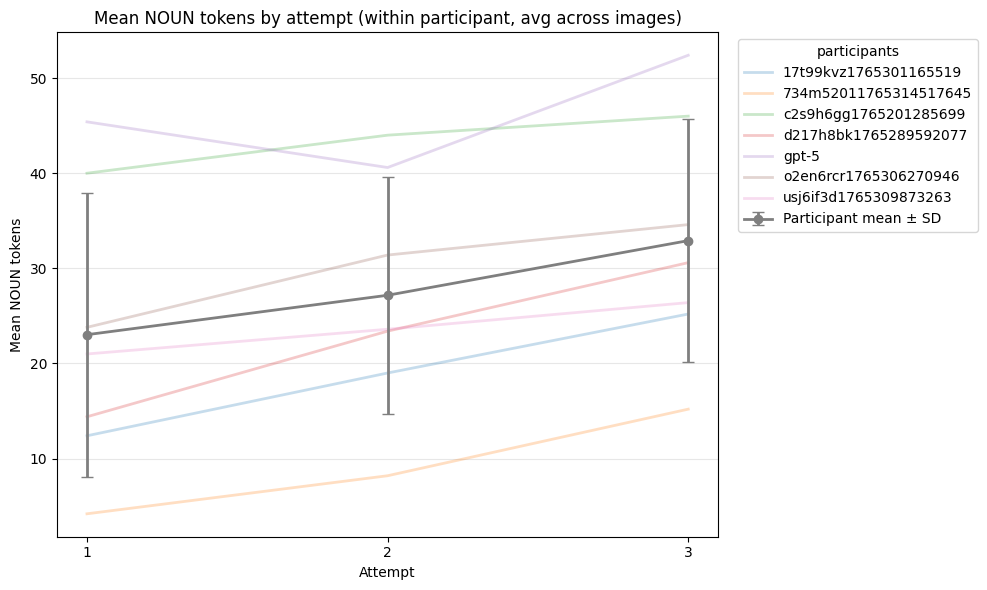

In [45]:
df_attempt = by_uid_gt_attempt.copy()
df_attempt["attempt"] = df_attempt["attempt"].astype(int)

metric_col = "pos_NOUN_total"
ylabel = "Mean NOUN tokens"

uid_attempt = (
    df_attempt.groupby(["uid", "attempt"], as_index=False)[metric_col]
    .mean()
)

attempts = sorted(uid_attempt["attempt"].unique())

plt.figure(figsize=(10, 6))

# Participant trajectories
for uid, g in uid_attempt.groupby("uid"):
    g = g.sort_values("attempt")
    plt.plot(
        g["attempt"],
        g[metric_col],
        alpha=0.25,
        linewidth=2,
        label=uid# suppress individual legend entries
    )

# Mean ± SD across participants
mean_by_attempt = uid_attempt.groupby("attempt")[metric_col].mean().reindex(attempts)
sd_by_attempt   = uid_attempt.groupby("attempt")[metric_col].std().reindex(attempts)

plt.errorbar(
    attempts,
    mean_by_attempt.values,
    yerr=sd_by_attempt.values,
    fmt="o-",
    capsize=4,
    linewidth=2,
    label="Participant mean ± SD"
)

plt.xticks(attempts)
plt.xlabel("Attempt")
plt.ylabel(ylabel)
plt.title(f"{ylabel} by attempt (within participant, avg across images)")
plt.grid(True, axis="y", alpha=0.3)

plt.legend(title="participants", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig(OUT_DIR / f"{metric_col}_by_attempt_participant_trajectories.png", dpi=300)
plt.show()

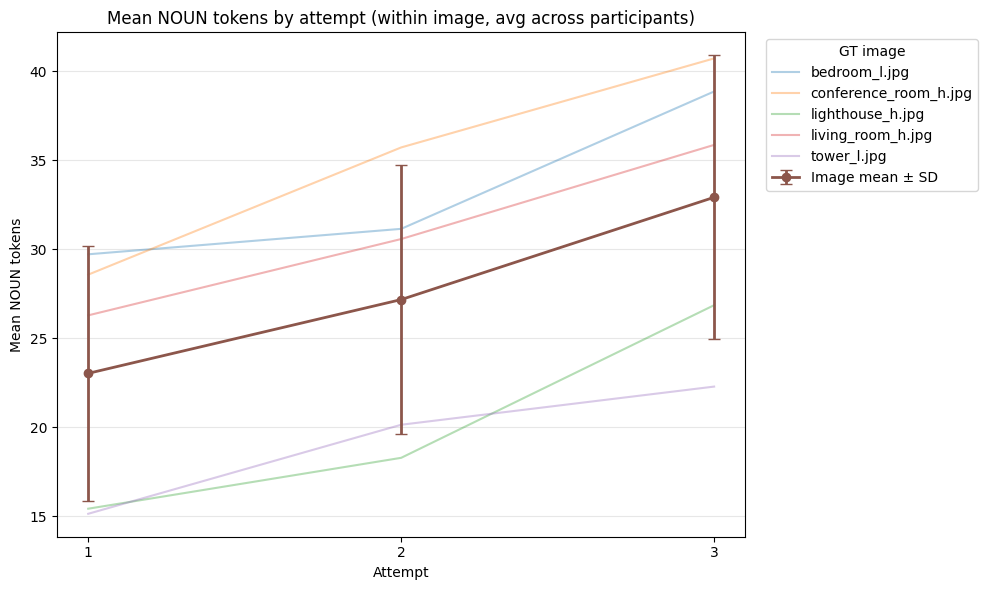

In [48]:
gt_attempt = (
    df_attempt.groupby(["gt", "attempt"], as_index=False)[metric_col]
    .mean()
)

attempts = sorted(gt_attempt["attempt"].unique())

plt.figure(figsize=(10, 6))

# Image trajectories
for gt, g in gt_attempt.groupby("gt"):
    g = g.sort_values("attempt")
    plt.plot(
        g["attempt"],
        g[metric_col],
        alpha=0.35,
        linewidth=1.5,
        label=str(gt)
    )

# Mean ± SD across images
mean_by_attempt = gt_attempt.groupby("attempt")[metric_col].mean().reindex(attempts)
sd_by_attempt   = gt_attempt.groupby("attempt")[metric_col].std().reindex(attempts)

plt.errorbar(
    attempts,
    mean_by_attempt.values,
    yerr=sd_by_attempt.values,
    fmt="o-",
    capsize=4,
    linewidth=2,
    label="Image mean ± SD"
)

plt.xticks(attempts)
plt.xlabel("Attempt")
plt.ylabel(ylabel)
plt.title(f"{ylabel} by attempt (within image, avg across participants)")
plt.grid(True, axis="y", alpha=0.3)

plt.legend(title="GT image", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig(OUT_DIR / f"{metric_col}_by_gt_and_attempt_trajectories.png", dpi=300)
plt.show()
